<a href="https://colab.research.google.com/github/meshrifalruily/Machine-learning-projects/blob/main/online_payments_fraud_detection_using_multiple_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'online-payments-fraud-detection-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2093649%2F3478314%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240427%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240427T125955Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da0b80d4b5caf33748f9f16de2057455a0db83d807e9544f8ba3e0bffc31983a0ef1f5e2133c5a1ed3d2267213f5d3fb3d17be2b1f252b5c1f5f0aabc18372a4c15cdceb4f0aeb395384e98926c93c1d5e757ddec2731455ef73efa67a99181eddbe319e6182db5ca9e6342ecddcfb5fa8d1046be8823613fbde1730b87c3d6f509e13084679235560efa02b3810f2b5826af37e74482f627fa3f2c475fb9d4f017141947e5ed799ec56f5ab03ea8443cc80ca1ff36bff1b9746788e6857eb72e327156b321fad261cd742687529c6525ae64c62c3331efc72eff55102195db22600e28f6f73cc1ac9b06c37316c0a1c1089e43a9f66287a7261384ad12449b5c'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



In [ ]:
data = pd.read_csv('/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv')
data.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
data.to_parquet('fraud_detection.parquet')

In [ ]:
df = pd.read_parquet('/kaggle/working/fraud_detection.parquet')
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0


In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes.value_counts()

float64    5
int64      3
object     3
Name: count, dtype: int64

In [ ]:
df.select_dtypes('object').columns

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [ ]:
def types_count(col):
    return df[col].value_counts()

for col in df.select_dtypes('object').columns:
    print(types_count(col))
    print('#'*50)

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64
##################################################
nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64
##################################################
nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64
##################################################


In [ ]:
cleaned_df =df.drop(['nameOrig','nameDest','isFlaggedFraud'], axis=1)

In [ ]:
cleaned_df.head(2)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0


In [ ]:
cleaned_df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

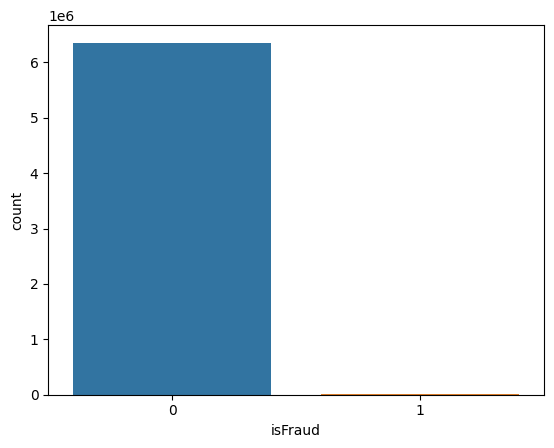

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x= 'isFraud')
plt.show()

In [ ]:
def down_sample(df):
    not_fraud = df[df['isFraud']==0].sample(n=8213, random_state=42)
    fraude = df[df['isFraud']==1]
    df = pd.concat([not_fraud , fraude], axis=0).reset_index(drop=True)
    return df

sample_df = down_sample(cleaned_df)

In [ ]:
sample_df.head(2)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,162,CASH_OUT,183806.32,19391.0,0.0,382572.19,566378.51,0
1,137,PAYMENT,521.37,0.0,0.0,0.00,0.00,0


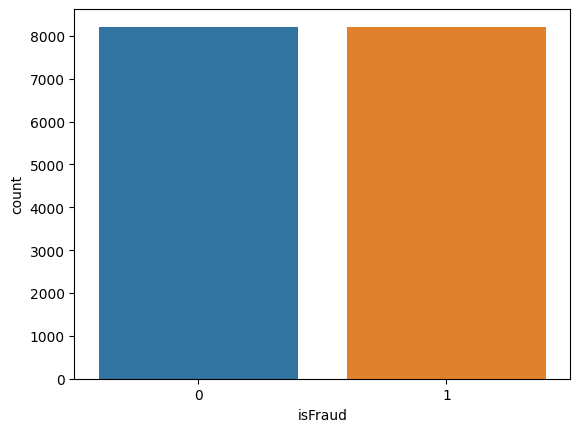

In [ ]:
sns.countplot(data=sample_df, x= 'isFraud')
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.decomposition import TruncatedSVD

cat_col = make_column_selector(dtype_include= 'object')
num_col = make_column_selector(dtype_include='number')


cat_pipe=Pipeline([

    ('cat_impute', SimpleImputer(strategy= 'most_frequent')),
    ('ohe', OneHotEncoder(sparse_output= False, handle_unknown= 'ignore')),
    ('dr', TruncatedSVD(n_components=3))


])

num_pipe = Pipeline([

    ('num_impu', SimpleImputer(strategy= 'mean')),
    ('stand', StandardScaler())

])


In [ ]:
transformer = ColumnTransformer([

    ('cat', cat_pipe, cat_col),
    ('num', num_pipe, num_col)
])


print(transformer)

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('cat_impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False)),
                                                 ('dr',
                                                  TruncatedSVD(n_components=3))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x783d0b7979d0>),
                                ('num',
                                 Pipeline(steps=[('num_impu', SimpleImputer()),
                                                 ('stand', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x783d0b7963

In [ ]:
from sklearn.model_selection import train_test_split

features = sample_df.drop('isFraud', axis=1)
target= sample_df.isFraud
X_train, X_test, y_train, y_test =  train_test_split(features, target, test_size=.2, shuffle=True, stratify= target, random_state=42)

In [ ]:
from sklearn.metrics import *
def model_eveluation(model, X_test= X_test, y_test= y_test):
    prediction = model.predict(X_test)
    print(f'the accuracy of the model is {round(accuracy_score(prediction, y_test),4)*100}%')
    print(f'the precision of the model is {precision_score(prediction, y_test, average= "macro")}')
    print(f'the recall of the model is {recall_score(prediction, y_test, average="macro")}')
    print(f'the f1 of the model is {f1_score(prediction, y_test, average="macro")}')
    cm = confusion_matrix(prediction, y_test)
    ConfusionMatrixDisplay(cm).plot()



In [ ]:
from sklearn.linear_model import LogisticRegression

clf = Pipeline([

    ('transformer', transformer),
    ('model',LogisticRegression(max_iter=1000) )
])

clf.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('dr',
                                                                   TruncatedSVD(n_components=3))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x783d0b7979d0>),
                                                 ('num',
                                                  Pipeline(steps=[('num_impu',
                                                                   SimpleImputer()),
                                                                  ('stand',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x783d0b7963e0>)])),
                ('model', LogisticRegression(max_iter=1000))])

the accuracy of the model is 92.73%
the precision of the model is 0.9272671941570299
the recall of the model is 0.9274396299974799
the f1 of the model is 0.9272598580289342


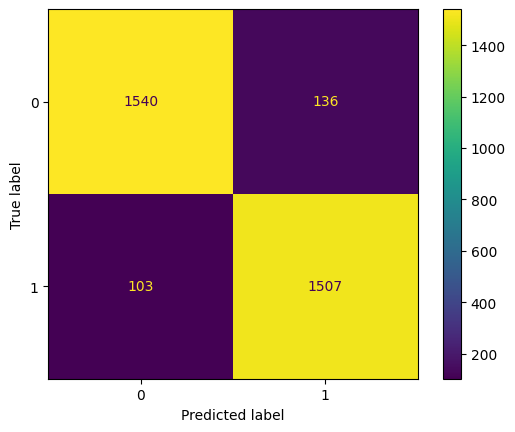

In [ ]:
model_eveluation(clf)

## Using SVC

In [ ]:
from sklearn.svm import SVC

clf = Pipeline([

    ('transformer', transformer),
    ('model',SVC() )
])

clf.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('dr',
                                                                   TruncatedSVD(n_components=3))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x783d0b7979d0>),
                                                 ('num',
                                                  Pipeline(steps=[('num_impu',
                                                                   SimpleImputer()),
                                                                  ('stand',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x783d0b7963e0>)])),
                ('model', SVC())])

the accuracy of the model is 0.9190505173463177
the precision of the model is 0.9190505173463177
the recall of the model is 0.9226680416762413


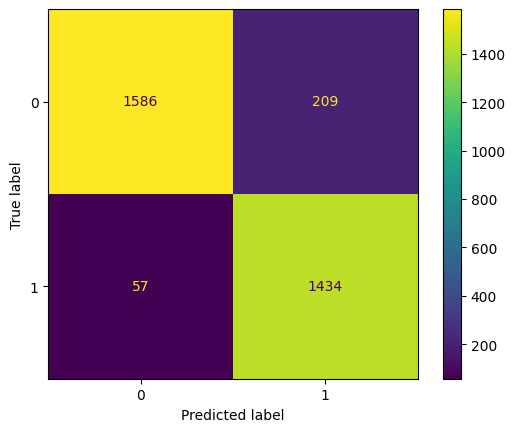

In [ ]:
model_eveluation(clf)

## Using RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([

    ('transformer', transformer),
    ('model',RandomForestClassifier(n_estimators= 70) )
])

clf.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('dr',
                                                                   TruncatedSVD(n_components=3))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x783d0b7979d0>),
                                                 ('num',
                                                  Pipeline(steps=[('num_impu',
                                                                   SimpleImputer()),
                                                                  ('stand',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x783d0b7963e0>)])),
                ('model', RandomForestClassifier(n_estimators=70))])

the accuracy of the model is 0.9939135727328059
the precision of the model is 0.9939135727328059
the recall of the model is 0.9939604170579873


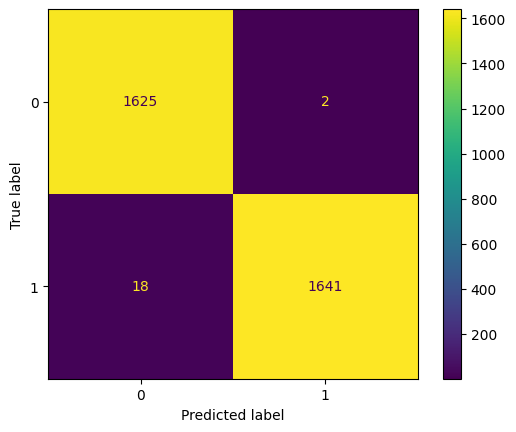

In [ ]:
model_eveluation(clf)